In [31]:
# IMPORTS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [32]:
# Ui Introduction 
def intro():
    print("--- WWII Aircraft Radar Classifier ---")
    print("This tool is meant to determine whether incoming aircraft are fighters or bombers in a WWII Radar Simulator.\n")


In [33]:
# provided sample data w/ features: [Wingspan, Fuselage Length]
data = [
    [42, 60],  # Bomber
    [35, 55],  # Bomber
    [29, 35],  # Bomber
    [23, 24],  # Fighter
    [26, 28],  # Fighter
    [22, 25],  # Fighter
]
    
# apply labels so that we know the correct answers
labels = [1, 1, 1, 0, 0, 0]  # Fighter(0), Bomber(1)

# get test and training sets (can't train and test on the same data because the model wont learn the pattern, only learn the correct answers) 

# created features and labels for test, and features and labels for training
# then split them using a 30% test size
# random state sets the seed for a random num generator, to shuffle the data
features_train, features_test, labels_train, labels_test = train_test_split(
    data, labels, test_size=0.3, random_state=42
)


# create decision tree obj
clf = DecisionTreeClassifier()

# train the classifier on the training set
clf = clf.fit(features_train, labels_train)

# have the model predict answers after training 
predictions = clf.predict(features_test)

# see how accurate the model is
accuracy = metrics.accuracy_score(labels_test, predictions)


In [34]:
# create graph of decision tree for visualization
def visualize_tree():
    plt.figure(figsize=(16, 12), dpi=120)  # size of graph and resolution
    plt.rcParams["font.size"] = 10  # try to decrease tree font size
    plot_tree(
        clf,  # the decision tree classifier
        feature_names=["Wingspan", "Fuselage Length"],  # column labels (names of features)
        class_names=["Fighter", "Bomber"],  # the correct answer categories
        filled=True,
        rounded=True,
    )
    plt.title("Decision Tree for WWII Aircraft Classification", fontsize=14)
    plt.axis('off')
    plt.show()

In [35]:
def determinePlaneType(result):
    if result[0] == 1:
        return "Bomber"
    elif result[0] == 0:
        return "Fighter"
    else:
        return "Invalid Label Return"

In [36]:
def getUserPlaneTest():
    # get wingspan from user, leave loop open until they input values or cancel
    while True:
        try: # throw errors if invalid input types
            userWingspan = float(input("What is the plane wingspan (in meters)? \n")) # prompt user for test wingspan
            userFuselageLength = float(input("How long is the plane fuselage (in meters)? \n")) # prompt user for test fuselage length
            return [userWingspan, userFuselageLength] # return the test values as a feature arr
        except ValueError: # throw errors if invalid input types
            print("Invalid measurement, make sure its a number\n")

--- WWII Aircraft Radar Classifier ---
This tool is meant to determine whether incoming aircraft are fighters or bombers in a WWII Radar Simulator.

--- Completed Training ---
Test Accuracy: 100.00%



Would you like to test with your own values? (yes/no) 
 yes
What is the plane wingspan (in meters)? 
 29
How long is the plane fuselage (in meters)? 
 60



Predicting... 

Bomber Incoming! 



Would you like to see the decision tree? 
 yes


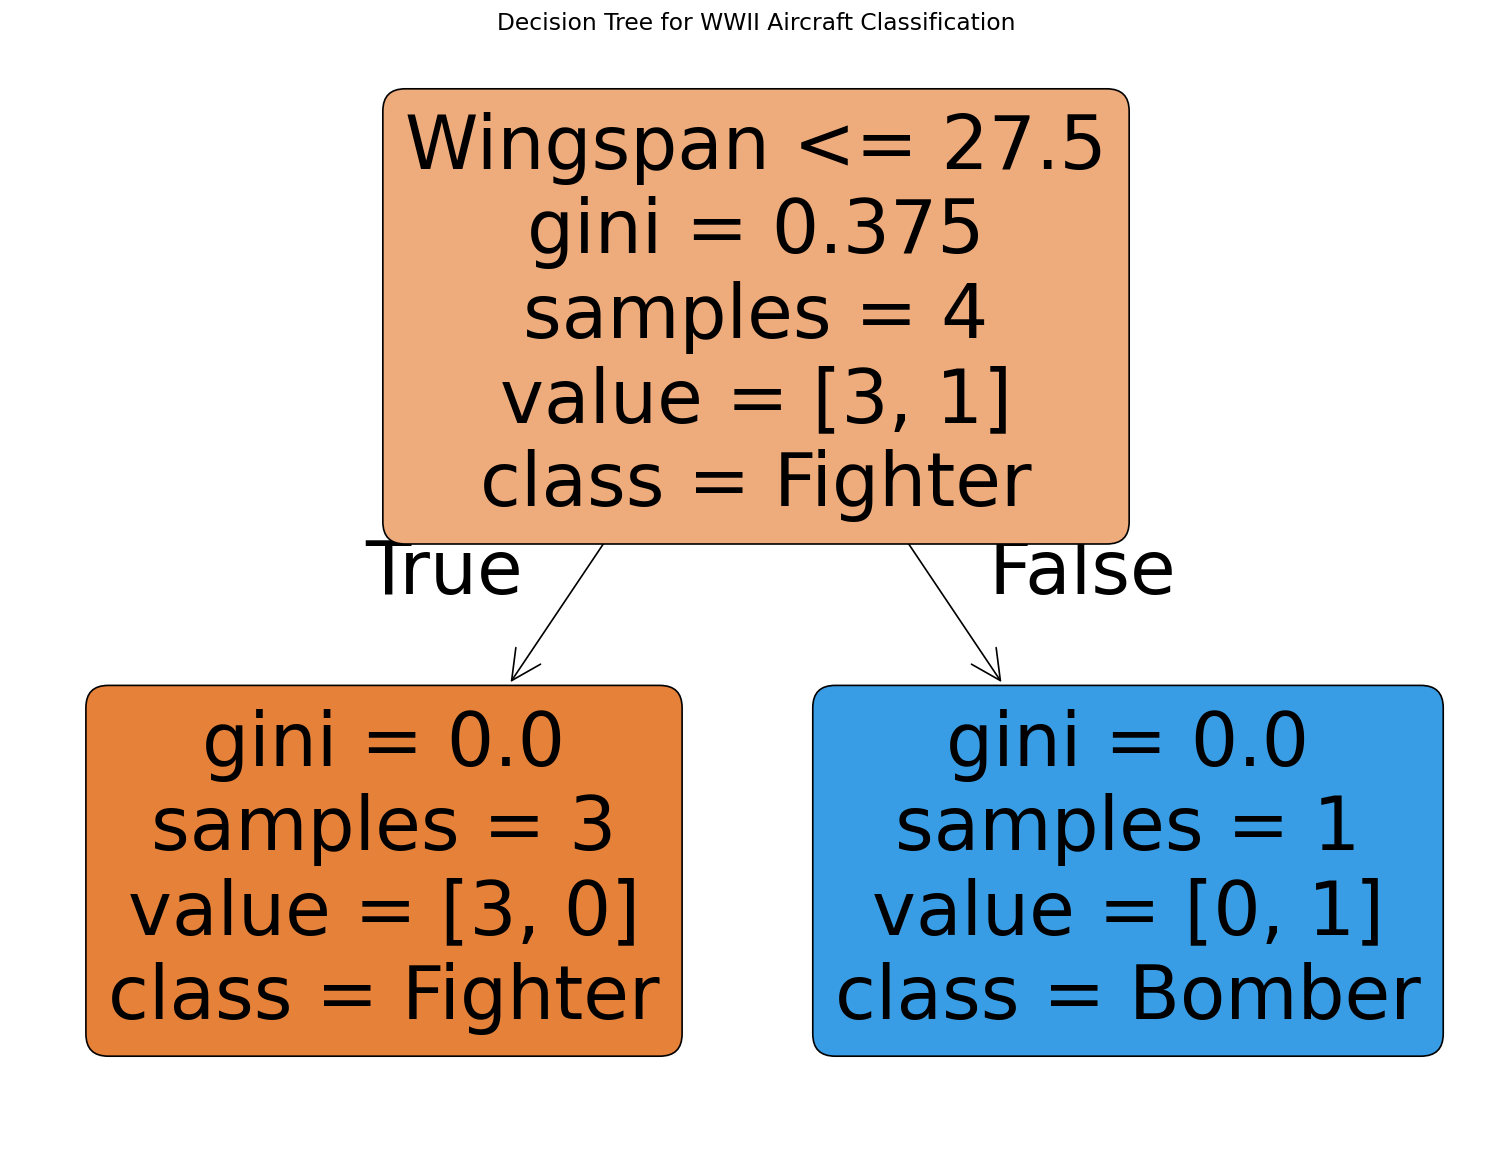

In [37]:
def main():
    intro()
    print("--- Completed Training ---")
    print(f"Test Accuracy: {accuracy * 100:.2f}%\n") # print accuracy up to 2 decimals

    # give user option to test the model with their own values    
    useUserInput = input("Would you like to test with your own values? (yes/no) \n").strip().lower()
    if useUserInput in ["yes", "y"]:
        new_plane = getUserPlaneTest()
    else: 
        print("--- Using Default Test Values ---\n")
        new_plane = [30,40] # near middle values, should classify as bomber

    print("\nPredicting... \n")
    result = clf.predict([new_plane]) # test model on user input or default test
    finalPrediction = determinePlaneType(result) # get final prediction value (fighter || bomber)
    
    # output final prediction
    print(f"{finalPrediction} Incoming! \n")

    # get user input 
    showDecisionTree = input("Would you like to see the decision tree? \n").strip().lower()
    
    if showDecisionTree in ["yes", "y"]:
        visualize_tree() # call function to create pyplot of data  (for visualization)
    else:
        print("Exiting...") # if user says anything other than yes/y, exit

main() # call main